# Shoulder Pain Dataset
## Description of the surgery
- In laparoscopic gallbladder surgery, carbon dioxide gas is forced into the  abdomen to separate the organs and improve visibility and access to the gallbladder.
- One side-effect of this is to separate the liver from the diaphragm, where it is usually supported in part by surface tension.
- The resulting strain on the tissues attaching the two causes pain that is felt in the shoulder (`referred pain`).
- This can be more severe than the pain from the (relatively minor) surgical incisions.

## Methodology
- A randomised trial explored using suction to drain out the carbon dioxide gas.
- Pain in the shoulder, at the incision, and over the abdomen was assessed twice daily for three days by a questionnaire.  There was no sign of any difference in wound or abdominal pain.
- You have data on shoulder pain, which has been recoded to a **0-4 scale, where 0 is no pain, and 4 is the most severe category reported**.

## Objective
- The goal is to assess the effectiveness of this intervention.

## The variables are
```
id:  a patient identifier
trt:  1 is post-operative suction, 2 is control
sex: 1 is male, 2 is female
age: in years
pain: 0-4 scale
time: 1 is the first, 6 is the last measurement on each person
```

## References
- Dataset are obtained from [Washington EDU](http://courses.washington.edu/b517/Datasets/datasets.html)

# Reasons for selecting Shoulder Pain Dataset
[Shoulder Pain Data](http://courses.washington.edu/b517/Datasets/shoulderdoc.txt) was selected because [clinicopathological](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9439782/) characteristics of the patients such as age and sex are important to evaluate the efficacy and the surgery and the demographic affected by gallbladder complications. Understanding the demographic that is highly affected by gallbladder complications will help medical community better understand and predict the type of patients that most likely need  laparoscopic gallbladder surgery.

## Below shows the steps in our approach to generating histograms from these criterias:
    1. Frequency distribution of the type of pain scale reported
    2. The frequency distribution showing differences between male versus female that has undergone the surgery
    3. The frequency distribution showing the variations of patient age that has undergone the surgery

In [3]:
# Import python library modules

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv('shoulder.csv')

# Review the first top 5 row of the data
df.head()

,id,trt,sex,age,pain,time
0,101,1,2,64,0,1
1,101,1,2,64,0,2
2,101,1,2,64,0,3
3,101,1,2,64,0,4
4,101,1,2,64,0,5


In [271]:
# Review the data type
print('Describe file info:\n')
print(df.info())

# review empty cells
print('\nData cleaning and validation:\n',df.isna().sum())

# review data summary
print('\nMetadata Summary:\n')
df.describe()

Describe file info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      246 non-null    int64
 1   trt     246 non-null    int64
 2   sex     246 non-null    int64
 3   age     246 non-null    int64
 4   pain    246 non-null    int64
 5   time    246 non-null    int64
dtypes: int64(6)
memory usage: 11.7 KB
None

Data cleaning and validation:
 id      0
trt     0
sex     0
age     0
pain    0
time    0
dtype: int64

Metadata Summary:



,id,trt,sex,age,pain,time
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,157.146341,1.463415,1.609756,55.048780,0.983740,3.500000
std,49.578910,0.499676,0.488799,16.120897,1.255088,1.711307
min,101.000000,1.000000,1.000000,20.000000,0.000000,1.000000
25%,111.000000,1.000000,1.000000,41.000000,0.000000,2.000000
50%,121.000000,1.000000,2.000000,56.000000,0.000000,3.500000
75%,209.000000,2.000000,2.000000,66.000000,2.000000,5.000000
max,219.000000,2.000000,2.000000,82.000000,4.000000,6.000000


## Observation
By running the basic functions: `head()`,`info()`, and `isna().sum()` the data shows there is no white space as all the values are consistent with `int64` and there is no `null` value noted in the `shoulder.csv`

# Histograms
- Frequency of pain scale reported 
- Data used is `pain` to evaluate the frequency
- References: [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
```python
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
```
- The bin values used for this histogram is 4 because the scale of pain is 0 - 4

Text(0, 0.5, 'Frequency')

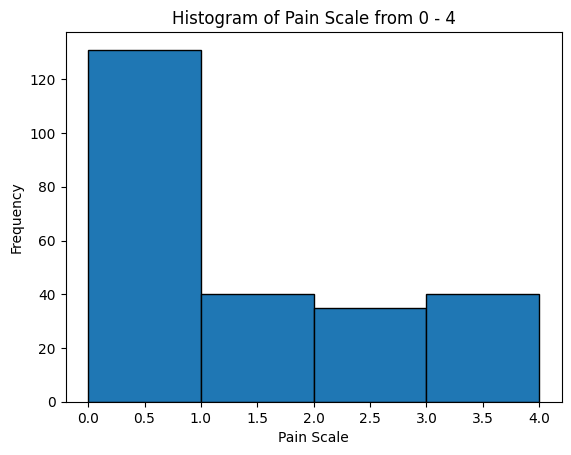

In [54]:
# Extract data from pain column
pain_col = df['pain']

plt.hist(pain_col,label='Histogram of Pain Scale',bins=4,edgecolor='black')
plt.title(label='Histogram of Pain Scale from 0 - 4')
plt.xlabel('Pain Scale')
plt.ylabel('Frequency')

### The frequency distribution showing differences between male versus female that has undergone the surgery
- Gender data is used where `1 represents male` and `2 represents female`
- References: [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)
```python
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
```

Text(0, 0.5, 'Frequency')

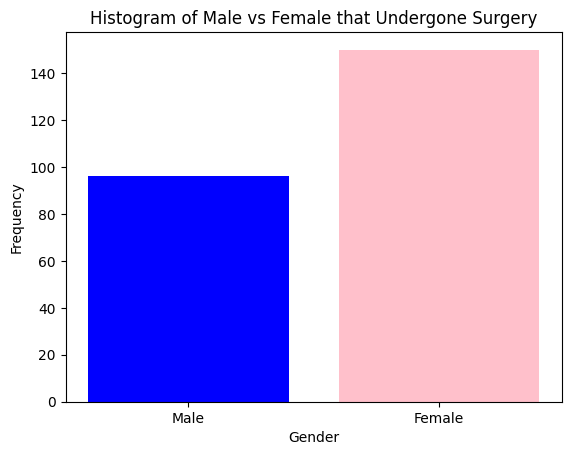

In [262]:
# extract gender data
gender_col = df['sex']

# Use pd.cut() function to bin into two categories
bins = pd.cut(gender_col,bins=2,labels=['Male','Female']).value_counts()

# Create a histogram using plot.bar function because the plt.hist() function is limited to generated different colour bar for different gender
plt.bar(['Male','Female'],height=[bins.Male,bins.Female],color=['blue','pink'])

# Stylize the chart
plt.title('Histogram of Male vs Female that Undergone Surgery')
plt.xlabel('Gender')
plt.ylabel('Frequency')

### The frequency distribution showing the variations of patient age that has undergone the surgery
- From the metadata analysis above using `pd.describe()` we noted that the age min age is 20 and the maximum age 82
- These values are used to design the next histogram. 
- For this histogram, only 8 bins are considered to produce a much more succint visuals

Text(0, 0.5, 'Frequency')

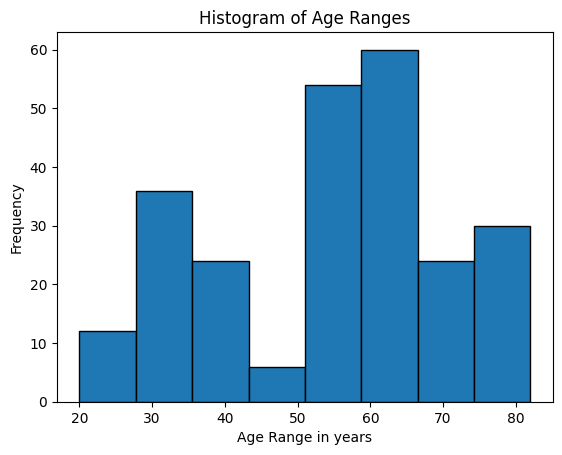

In [280]:
# get age data
age_col = df['age']

# Plot histograph
plt.hist(age_col,bins=8,edgecolor='black',label='Frequency')
plt.title('Histogram of Age Ranges')
plt.xlabel('Age Range in years')
plt.ylabel('Frequency')

# Discussion
## What is the use case of your plot?
[Clinicopathological](https://www.merriam-webster.com/dictionary/clinicopathologic) characteristics of the patients such as **sex and age** are important factors to help identify the frequency of gallstones present in different types of patients. [According to John Hopkins Medicine](https://www.hopkinsmedicine.org/health/conditions-and-diseases/gallstones), risk factors for increased formation of gallstones are:

| Risk Factor | Explanation |
| --- | --- |
| Estrogen | Excess estrogen from pregnancy, hormone replacement therapy, or birth control pills appears to increase cholesterol levels in bile and decrease gallbladder movement, both of which can lead to gallstones |
| Gender | Women are twice as likely to develop gallstones than men |
| Age | People over 60 are more likely to develop gallstones than younger people |

Therefore histogram is a good way to start analyzing populations that are affected by gallstones disease and the efficacy of the trial involving suction to drain out the carbon dioxide gas. 

## What insight can be derived from this form of the chart?
The histograms below shows there are correlation between age and gender of these patients affecting by gallstone disease
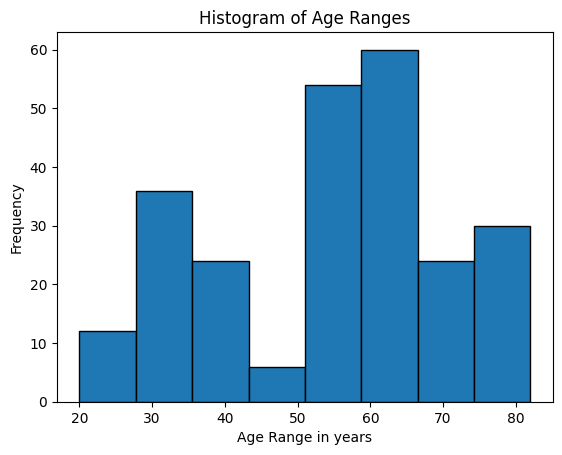 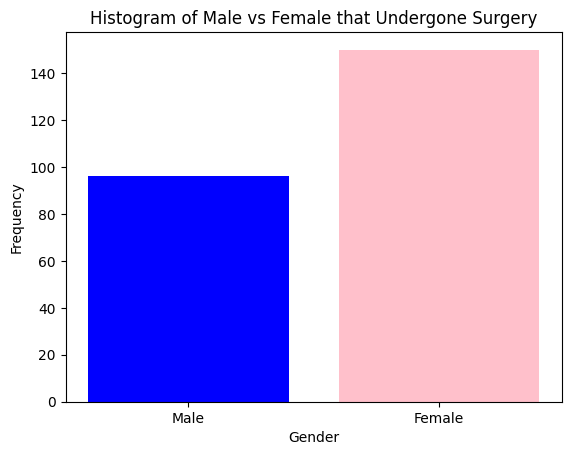

### Histogram vs Age Ranges
The histogram shows that the patients ages 50 years and above have higher gallstone diagnosis than the younger age ranges. Therefore, **age** is a risk factors for gallstone development as described by John Hopkins Medicine (JHM).

### Histogram vs Gender
The histogram hsows that females are more likely to go to surgery for gallstone bladder than males. Which reflects with the risk factors described by JHM, where estrogen hormone replacement therapy and women are more likely to develop gallstones.

### Pain Scale Histogram
The histogram below shows the pain scale frequency reported after the surgery
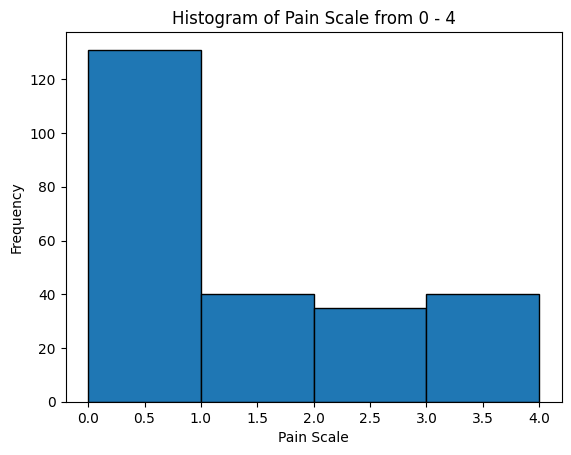

### Pain Scale Histogram
Post-surgery the histogram showed that most patients have low to zero report of pain. Therefore, gallstone surgery might not be as painful as it seems due to the advances of medical anethesia and the high quality skills of the surgeon conducting the operation.

# Conclusion
Histogram can be a great and basic way to get initial visualizations for demographic data and how the occurances of gallstone bladder diseases affect different people based on age and gender. However, there are some caveats at which correlation is not causation and I do not have a medical degree and further interpretation can lead to ethical violations in the medical community. Further review and assessments of these charts must be done by a medical professional. 